<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Изменение-названия-столбцов" data-toc-modified-id="Изменение-названия-столбцов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><strong>Изменение названия столбцов</strong></a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Кодирование-категориальных-признаков" data-toc-modified-id="Кодирование-категориальных-признаков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><strong>Кодирование категориальных признаков</strong></a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Маштабирование-признаков" data-toc-modified-id="Маштабирование-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Маштабирование признаков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из банка стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Используемые бибилиотеки**

In [1]:
!pip install scikit-learn --upgrade

     |████████████████████████████████| 9.6 MB 1.2 MB/s eta 0:00:01     |████████████████████▋           | 6.2 MB 1.2 MB/s eta 0:00:03     |███████████████████████████▋    | 8.3 MB 1.2 MB/s eta 0:00:02     |████████████████████████████████| 9.6 MB 1.2 MB/s 
     |████████████████████████████████| 297 kB 53.3 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

## Подготовка данных

**Глобальные переменные**

In [3]:
STATE = 12345

**Открываем файл**

In [4]:
try:
    df = pd.read_csv('Churn.csv')
except:
    df = pd.read_csv('/datasets/Churn.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


#### Вывод: 
Видим, что некоторые признаки категориальные, такие как `Geography`, `Gender`. А значит их надо перевести в количественные путем кодирования. Также меня не устраивает названия колонок, и их стоит привести к snake_case.

### **Изменение названия столбцов**

In [7]:
list(map(lambda x: x.lower(), list(df.columns)))
df.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography', 
              'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
              'is_active_member', 'estimated_salary', 'exited']
df.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


#### Вывод:
Поменяли названия столбцов для красоты и лучшего восприятия

**Заполнение пропусков**

В столбце `tenure` есть пропущенные значения, которые стоит заполнить, так как иначе в дальнейшем модель не будет работать из-за этого

In [8]:
df['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

In [9]:
df['tenure'] = df['tenure'].fillna(df['tenure'].median())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


#### Вывод:
Заполнили пропуски средним значением, так как сильного разброса значений нет в столбце `tenure`

### **Кодирование категориальных признаков**

Посмотрим какие уникальные значения в столбцах `geography` и `gender`, чтобы понять можно ли безболезненно воспользоваться известными нам кодировками, в частности, One-Hot Encoding

In [11]:
df.geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

Видим, что OHE сюда прекрасно подойдет

In [13]:
df = df.drop(['surname', 'customer_id', 'row_number'], axis=1)

In [14]:
target = df['exited']
features = df.drop(['exited'], axis=1)

features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                              test_size=0.25, random_state=STATE)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, 
                                                                              test_size=0.25, random_state=STATE)

In [15]:
cat_features = ['geography', 'gender']

ohe_encoder = OneHotEncoder(drop='first', sparse=False)

train_temp = ohe_encoder.fit_transform(features_train[cat_features])
features_train[ohe_encoder.get_feature_names_out()] = train_temp
features_train.drop(cat_features, axis=1, inplace=True)

valid_temp = ohe_encoder.transform(features_valid[cat_features])
features_valid[ohe_encoder.get_feature_names_out()] = valid_temp
features_valid.drop(cat_features, axis=1, inplace=True)

test_temp = ohe_encoder.transform(features_test[cat_features])
features_test[ohe_encoder.get_feature_names_out()] = test_temp
features_test.drop(cat_features, axis=1, inplace=True)

In [16]:
features_train

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
9315,694,42,8.0,133767.19,1,1,0,36405.21,0.0,0.0,1.0
58,511,66,4.0,0.00,1,1,0,1643.11,0.0,1.0,0.0
4609,581,34,1.0,0.00,2,0,1,81175.25,0.0,1.0,1.0
9958,537,37,6.0,0.00,1,1,1,17802.42,0.0,0.0,1.0
16,653,58,1.0,132602.88,1,1,0,5097.67,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1661,690,32,0.0,106683.52,2,1,1,137916.49,1.0,0.0,1.0
3419,674,26,10.0,0.00,2,1,1,138423.10,0.0,0.0,0.0
3148,648,39,6.0,130694.89,2,1,1,153955.38,0.0,0.0,0.0
5617,626,43,4.0,137638.69,1,1,0,130442.08,0.0,0.0,1.0


#### Вывод:
Вот и получили, что в датасете теперь нет категориальных признаков

### Маштабирование признаков

Проведем стандартизацию всех численных признаков

In [19]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [20]:
features_train

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
9315,0.436123,0.302839,1.073302,0.932262,1,1,0,-1.121738,0.0,0.0,1.0
58,-1.458825,2.563332,-0.377280,-1.217770,1,1,0,-1.724514,0.0,1.0,0.0
4609,-0.733981,-0.450659,-1.465217,-1.217770,2,0,1,-0.345423,0.0,1.0,1.0
9958,-1.189597,-0.168097,0.348011,-1.217770,1,1,1,-1.444311,0.0,0.0,1.0
16,0.011572,1.809834,-1.465217,0.913549,1,1,0,-1.664612,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1661,0.394703,-0.639033,-1.827862,0.496948,2,1,1,0.638472,1.0,0.0,1.0
3419,0.229025,-1.204156,1.798593,-1.217770,2,1,1,0.647257,0.0,0.0,0.0
3148,-0.040203,0.020277,0.348011,0.882882,2,1,1,0.916587,0.0,0.0,0.0
5617,-0.268011,0.397026,-0.377280,0.994489,1,1,0,0.508866,0.0,0.0,1.0


## Исследование задачи

Имеем итоговые данные, по которым можно провести обучение модели без учета дисбаланса классов

In [21]:
model = LogisticRegression(solver='liblinear', random_state=STATE)
model.fit(features_train, target_train)

LogisticRegression(random_state=12345, solver='liblinear')

In [22]:
predicted_valid = model.predict(features_valid)
accuracy = accuracy_score(target_valid, predicted_valid)
accuracy

0.8128

Теперь посмотрим на константную модель, чтобы оценить адекватность модели

In [23]:
target_pred_constant = pd.Series([0] * len(target_valid))
accuracy = accuracy_score(target_valid, target_pred_constant)
accuracy

0.7973333333333333

Получается, что точность для константной модели и для модели линейной регрессии одинаковая) Это стоит исправить, скорее всего у нас присутствует большой дисбаланс классов, посмотрим на него:

Text(0, 0.5, 'Стандартизированное значение частоты встречаемости классов')

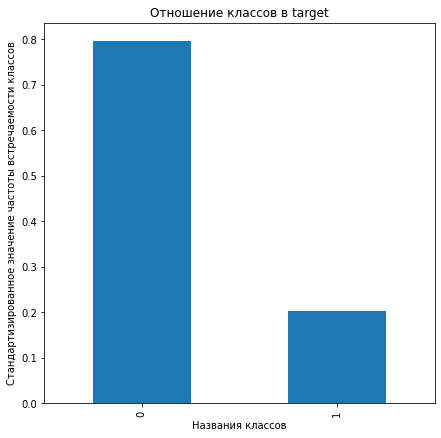

In [24]:
target.value_counts(normalize=True).plot(kind='bar', figsize=(7, 7))
plt.title('Отношение классов в target')
plt.xlabel('Названия классов')
plt.ylabel('Стандартизированное значение частоты встречаемости классов')

Text(0, 0.5, 'Стандартизированное значение частоты встречаемости классов')

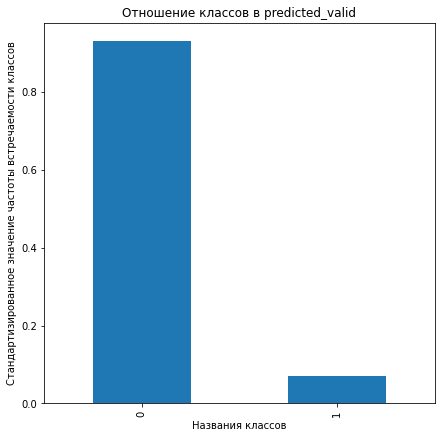

In [25]:
pd.Series(predicted_valid).value_counts(normalize=True).plot(kind="bar", figsize=(7, 7))
plt.title('Отношение классов в predicted_valid')
plt.xlabel('Названия классов')
plt.ylabel('Стандартизированное значение частоты встречаемости классов')

Отношение классов 4 / 1, это явный дисбаланс. Дальнейший перебор гиперпараметров и моделей в целом ничего не поменяет, а значит стоит устранить дисбаланс классов. Причем наша модель предсказывает как и константная, а значит что-то явно не так. Смысла смотреть другие метрики нет, такие как precision, recall и F1 нет смысла, так как наша модель вообще не определяет другого класса, а значит и большинство метрик будут бесполезными(F1 уж точно). Но так как мы занимаемся исследованием, то посмотрим на модели без учета дисбаланса.

**LogReg**

In [26]:
model = LogisticRegression(solver='liblinear', random_state=STATE)
model.fit(features_train, target_train)

predict_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))
print('ROC-AUC:', roc_auc_score(target_valid, predicted_valid))

F1: 0.3131115459882583
ROC-AUC: 0.5882063017074459


**TreeClassifier**

In [27]:
model = DecisionTreeClassifier(random_state=STATE)
model.fit(features_train, target_train)

predict_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))
print('ROC-AUC:', roc_auc_score(target_valid, predicted_valid))

F1: 0.3131115459882583
ROC-AUC: 0.5882063017074459


**RandomForest**

In [28]:
model = RandomForestClassifier(random_state=STATE)
model.fit(features_train, target_train)

predict_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))
print('ROC-AUC:', roc_auc_score(target_valid, predicted_valid))

F1: 0.3131115459882583
ROC-AUC: 0.5882063017074459


#### Вывод:
Увидели явный дисбаланс классов в наших данных, без его учета все модели классификации показывают низкие значения метрик

## Борьба с дисбалансом

**Взвешенные классы**

In [29]:
model = LogisticRegression(random_state=STATE, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))
print('ROC-AUC:', roc_auc_score(target_valid, predicted_valid))

F1: 0.5203405865657521
ROC-AUC: 0.727393944728041


**Upstamping**

In [30]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

**LogReg upsampled**

In [31]:
model = LogisticRegression(random_state=STATE, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))
print('ROC-AUC:', roc_auc_score(target_valid, predicted_valid))

F1: 0.5213270142180095
ROC-AUC: 0.728062841049111


**RandomForest upsampled**

In [32]:
model_upstamping = RandomForestClassifier(random_state=STATE)

model_upstamping.fit(features_upsampled, target_upsampled)
predicted_valid = model_upstamping.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid).round(4))
print('ROC-AUC:', roc_auc_score(target_valid, predicted_valid))

F1: 0.5927
ROC-AUC: 0.7329915507833128


**Downstamping**

In [33]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_ones.sample(frac=fraction, random_state=STATE)] + [features_zeros])
    target_downsampled = pd.concat(
        [target_ones.sample(frac=fraction, random_state=STATE)] + [target_zeros])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=STATE)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

**LogReg downsampled**

In [34]:
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))
print('ROC-AUC:', roc_auc_score(target_valid, predicted_valid))

F1: 0.020779220779220776
ROC-AUC: 0.5049287097342017


**Random Forest downsampled**

In [35]:
model_upstamping.fit(features_downsampled, target_downsampled)
predicted_valid = model_upstamping.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid).round(4))
print('ROC-AUC:', roc_auc_score(target_valid, predicted_valid))

F1: 0.3397
ROC-AUC: 0.6015842281288505


**Изменение порога**

In [36]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.1, 0.45, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    F1 = f1_score(target_valid, predicted_valid)
    ROC_AUC = roc_auc_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | F1 = {:.3f} | ROC-AUC = {:.3f}".format(
        threshold, F1, ROC_AUC))

Порог = 0.10 | F1 = 0.503 | ROC-AUC = 0.690
Порог = 0.12 | F1 = 0.468 | ROC-AUC = 0.663
Порог = 0.14 | F1 = 0.420 | ROC-AUC = 0.635
Порог = 0.16 | F1 = 0.376 | ROC-AUC = 0.613
Порог = 0.18 | F1 = 0.348 | ROC-AUC = 0.602
Порог = 0.20 | F1 = 0.315 | ROC-AUC = 0.590
Порог = 0.22 | F1 = 0.275 | ROC-AUC = 0.576
Порог = 0.24 | F1 = 0.261 | ROC-AUC = 0.573
Порог = 0.26 | F1 = 0.205 | ROC-AUC = 0.554
Порог = 0.28 | F1 = 0.169 | ROC-AUC = 0.544
Порог = 0.30 | F1 = 0.143 | ROC-AUC = 0.536
Порог = 0.32 | F1 = 0.126 | ROC-AUC = 0.532
Порог = 0.34 | F1 = 0.089 | ROC-AUC = 0.522
Порог = 0.36 | F1 = 0.065 | ROC-AUC = 0.515
Порог = 0.38 | F1 = 0.066 | ROC-AUC = 0.516
Порог = 0.40 | F1 = 0.041 | ROC-AUC = 0.510
Порог = 0.42 | F1 = 0.031 | ROC-AUC = 0.507
Порог = 0.44 | F1 = 0.026 | ROC-AUC = 0.506


Как видим, наилучший вариант борьбы с дисбалансом это взвешенные классы и upsampled, осталось подумать как улучшить саму модель

**DecisionTreeClassifier**

In [37]:
parametrs_tree_classifier = { 'max_depth': range (1,13, 2),
    'min_samples_split': range (2,10,2),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_leaf': range (1,8)
}

In [38]:
model = DecisionTreeClassifier(random_state=STATE, class_weight='balanced')
grid = GridSearchCV(model, parametrs_tree_classifier, scoring='f1')
grid.fit(features_train, target_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=12345),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2)},
             scoring='f1')

In [39]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 8}

In [40]:
model = DecisionTreeClassifier(random_state=STATE, class_weight='balanced', **grid.best_params_)
model.fit(features_train, target_train)
predict_valid = model.predict(features_valid)
print(f'Лучшее значение метрики F1: {f1_score(predict_valid, target_valid).round(4)}')
print('ROC-AUC:', roc_auc_score(target_valid, predicted_valid))

Лучшее значение метрики F1: 0.5754
ROC-AUC: 0.5062444992078858


**RandomForest**

In [41]:
parametrs_random_forest = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [ ]:
model = RandomForestClassifier(random_state=STATE, class_weight='balanced')
grid = GridSearchCV(model, parametrs_random_forest, scoring='f1')
grid.fit(features_train, target_train)

In [ ]:
grid.best_params_

In [ ]:
best_forest_model = RandomForestClassifier(random_state=STATE, class_weight='balanced', **grid.best_params_)

best_forest_model.fit(features_train, target_train)
best_forest_result = best_forest_model.score(features_valid, target_valid)
print('Лучшее значение F1:', f1_score(target_valid, best_forest_model.predict(features_valid)).round(4))
print('ROC-AUC:', roc_auc_score(target_valid, predicted_valid).round(4))

**LogReg**

In [ ]:
parametrs_regression = { 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': range (500, 2500, 500)
}

In [ ]:
model = LogisticRegression(random_state=STATE, class_weight='balanced')
grid = GridSearchCV(model, parametrs_regression)
grid.fit(features_train, target_train)

In [ ]:
grid.best_params_

In [ ]:
best_regression_model = LogisticRegression(max_iter=500, solver='newton-cholesky', random_state=STATE, class_weight='balanced')
best_regression_model.fit(features_train, target_train)
valid_predict = best_regression_model.predict(features_valid)
best_regression_accuracy = f1_score(target_valid, predict_valid)
print(f'Лучшее значение F1: {best_regression_accuracy.round(4)}')
print('ROC-AUC:', roc_auc_score(target_valid, predicted_valid).round(4))

**Random Forest с upsampling**

In [ ]:
forest_upsampling_model = RandomForestClassifier(random_state=STATE)
grid = GridSearchCV(forest_upsampling_model, parametrs_random_forest)
grid.fit(features_upsampled, target_upsampled)

In [ ]:
grid.best_params_

In [ ]:
model = RandomForestClassifier(random_state=STATE, **grid.best_params_)

model.fit(features_upsampled, target_upsampled)
predict_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predict_valid))
print('ROC-AUC:', roc_auc_score(target_valid, predicted_valid).round(4))

#### Вывод:
Лучшее значение F1-метрики у дерева решений, что не удивительно, методом GridSearch были найдены лучшие гиперпараметры, которые помогли достичь результата в 0,634 по F1-метрике. Все таки upsampling оказался лучше, чем взвешивание классов

## Тестирование модели

Возьмем наилучшую модель RandomForest и посмотрим F1-меру на тестовой выборке для моделей обученных на выборке с upstamping и взвешенными классами соответственно:

In [ ]:
print('F1:', f1_score(target_test, model.predict(features_test)).round(4))

In [ ]:
print('F1:', f1_score(target_test, best_forest_model.predict(features_test)).round(4))

Модель с upstamping показала лучший результат, значит ROC-AUC будем рассчитывать именно для этой модели

In [ ]:
probabilities_test = model_upstamping.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)
auc_roc

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

Видим, что по графику мы можем оценить нашу модель model_upstamping(RandomForest) как качественную, так как площадь под синей линией примерно равна 0,85

#### Вывод:
Провели тестирование, значение F1-метрики: 0.6382. ROC-кривая отображает хорошоее качество полученнйо модели

## Вывод:

В процессе выполнения проекта были сделаны следующие пункты:
- Предобработка данных. В данном разделе все категориальные переменные, которые имели смысл были переведены в количественные путем One_Hot_Encoding. Также все столбцы были приведены к snake_case, и заполнены пропски в столбце `tenure`.
- Исследована задача. Были исследованы следующие пункты: дисбаланс классов, изучены метрики построенных моделей без учета дисбаланса, сделаны выводы о том, как бороться с дисбалансом
- Учет дисбаланса. В данном разделе были изучены несколько вариантов борьбы с дисбалансом классов, самые успешные оказались upstamping и взвешивание классов, были постороены первые модели с учетом дисбаланса. Далее с помощью GridSearchSV и перебора гиперпараметров были получены лучшие гиперпараметры.
- Проведено тестирование. На тестировании двух лучших моделей с разным подходом учета дисбаланса были получены F1-метрики, близкие к 0,64. ROC-AUC показывает высокое качество лучшей модели, которая обучена с upstamping. Площадь под ROC-AUC ~~ 0,85